In [1]:
import tushare as ts
token = '6feca07b866ea55bd6024aa5a8891d7bc11afd829d1386c8a2fc8d89'
# initial
pro = ts.pro_api(token)

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import pandas as pd
import numpy as np
from scipy import stats
import time

In [181]:
index_code = '399300.SZ'

In [182]:
# weight %
t = datetime.date.today()
start_date = datetime.datetime(t.year, t.month, 1)
start_date_str = start_date.strftime("%Y%m%d")
end_date_str = t.strftime("%Y%m%d")
etf300 = pro.index_weight(index_code=index_code, start_date=start_date_str, end_date=end_date_str)

In [183]:
etf300.tail()

,index_code,con_code,trade_date,weight
295,399300.SZ,000157.SZ,20190201,0.1663
296,399300.SZ,000069.SZ,20190201,0.2591
297,399300.SZ,000063.SZ,20190201,0.4793
298,399300.SZ,000002.SZ,20190201,1.3283
299,399300.SZ,000001.SZ,20190201,0.9491


In [184]:
# index daily price
time_spread = 10 # Years
t = datetime.date.today()
end_date = t
start_date = datetime.datetime(t.year - time_spread, t.month, t.day)
end_date_str = end_date.strftime("%Y%m%d")
start_date_str = start_date.strftime("%Y%m%d")
p_t = ['trade_date'] #, 'open', 'high', 'low', 'close']
price = pro.index_daily(ts_code=index_code, start_date=start_date_str, end_date=end_date_str)
p = price[p_t] #.sort_values(by='trade_date')
#p['trade_date'] = pd.to_datetime(p['trade_date'])
#p.set_index("trade_date", inplace=True)

In [185]:
#p = p.assign(pe=0.0, pb=0.0)

In [186]:
p.head()

,trade_date
0,20190222
1,20190221
2,20190220
3,20190219
4,20190218


In [187]:
len(p)

2434

In [188]:
r_t = 'ts_code,trade_date,pe' #,pb,circ_mv,total_mv,

In [189]:
#cs = ['000157.SZ','000069.SZ','000063.SZ','000002.SZ','000001.SZ']

In [190]:
cs = etf300['con_code'].values

In [191]:
len(cs)

300

In [192]:
i=0
for c in cs:
    df = pro.daily_basic(ts_code=c, start_date=start_date_str, end_date=end_date_str, fields=r_t)
    df = df.drop(['ts_code'], axis=1)
    p = pd.merge(p,df,how='left')
    p = p.rename({'pe':c}, axis=1)
    time.sleep(0.3)
    i=i+1
    if(i%10==0):
        print(i)
    #print(c)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300


In [193]:
p.head()

,trade_date,601138.SH,001965.SZ,603259.SH,601066.SH,002925.SZ,600025.SH,603260.SH,001979.SZ,601155.SH,...,000423.SZ,000415.SZ,000413.SZ,000408.SZ,000402.SZ,000157.SZ,000069.SZ,000063.SZ,000002.SZ,000001.SZ
0,20190222,17.4889,15.6097,81.3165,31.3249,27.2779,28.5346,24.7821,13.5509,11.7873,...,14.1563,10.1103,17.9105,18.9958,7.3371,24.0367,6.2172,25.5516,10.6134,8.5449
1,20190221,16.9800,15.5180,78.4845,28.4686,28.2753,28.3701,23.5012,13.6156,11.4429,...,14.2491,9.4519,17.6147,18.9794,7.2078,23.6849,6.2552,23.2295,10.6056,8.4116
2,20190220,17.2034,15.6281,80.0960,26.8499,27.6228,28.0412,24.3271,13.7450,11.4841,...,14.4154,9.1698,17.6804,18.5853,7.3172,23.6849,6.3406,22.0272,10.8732,8.4486
3,20190219,17.2779,15.7198,80.7634,26.1644,27.0309,27.8767,24.1107,13.0141,11.4017,...,14.4730,9.3344,18.0748,18.4704,7.3371,23.6849,6.2077,22.0823,10.6370,8.3449
4,20190218,17.3151,15.6831,81.2211,25.6122,26.7746,27.9590,24.3846,12.9683,11.5140,...,14.6714,8.9582,17.9105,18.5853,7.3570,23.8608,6.2172,22.1557,10.7039,8.4116


In [194]:
p.fillna(method='ffill', inplace=True)

In [195]:
w = etf300['weight']

In [204]:
etf300['weight'].sum()

100.0005

In [196]:
w=w.values/100

In [198]:
p = p.sort_values(by='trade_date')
p['trade_date'] = pd.to_datetime(p['trade_date'])
p.set_index("trade_date", inplace=True)

In [212]:
p.tail()

,601138.SH,001965.SZ,603259.SH,601066.SH,002925.SZ,600025.SH,603260.SH,001979.SZ,601155.SH,601108.SH,...,000423.SZ,000415.SZ,000413.SZ,000408.SZ,000402.SZ,000157.SZ,000069.SZ,000063.SZ,000002.SZ,000001.SZ
trade_date,,,,,,,,,,,,,,,,,,,,,
2019-02-18,17.3151,15.6831,81.2211,25.6122,26.7746,27.9590,24.3846,12.9683,11.5140,21.1197,...,14.6714,8.9582,17.9105,18.5853,7.3570,23.8608,6.2172,22.1557,10.7039,8.4116
2019-02-19,17.2779,15.7198,80.7634,26.1644,27.0309,27.8767,24.1107,13.0141,11.4017,21.5970,...,14.4730,9.3344,18.0748,18.4704,7.3371,23.6849,6.2077,22.0823,10.6370,8.3449
2019-02-20,17.2034,15.6281,80.0960,26.8499,27.6228,28.0412,24.3271,13.7450,11.4841,21.4538,...,14.4154,9.1698,17.6804,18.5853,7.3172,23.6849,6.3406,22.0272,10.8732,8.4486
2019-02-21,16.9800,15.5180,78.4845,28.4686,28.2753,28.3701,23.5012,13.6156,11.4429,21.5254,...,14.2491,9.4519,17.6147,18.9794,7.2078,23.6849,6.2552,23.2295,10.6056,8.4116
2019-02-22,17.4889,15.6097,81.3165,31.3249,27.2779,28.5346,24.7821,13.5509,11.7873,23.6732,...,14.1563,10.1103,17.9105,18.9958,7.3371,24.0367,6.2172,25.5516,10.6134,8.5449


In [207]:
p.iloc[0]

601138.SH      24.6135
001965.SZ      24.0516
603259.SH      26.4085
601066.SH      14.8532
002925.SZ      33.1044
600025.SH     110.5147
603260.SH      28.9036
001979.SZ      53.5402
601155.SH      42.9501
601108.SH      32.9381
601228.SH      30.4638
603833.SH      31.5265
601881.SH      10.1110
300408.SZ      32.0451
603858.SH      15.5126
600977.SH      27.6077
601611.SH      16.4570
601212.SH     161.2639
603799.SH      29.9721
300433.SZ      18.9445
603160.SH      32.8852
603986.SH      21.2254
601985.SH      30.7311
601828.SH      17.0789
601021.SH      14.2851
600023.SH      23.1187
000333.SZ      21.8545
601808.SH      29.5324
601939.SH      14.5182
002179.SZ      36.8488
               ...    
000792.SZ      44.6442
000786.SZ      20.1807
000783.SZ      10.3804
000776.SZ      24.5288
000768.SZ     273.2209
000728.SZ      10.3464
000725.SZ      20.3831
000709.SZ      10.3122
000703.SZ      16.0704
000671.SZ      87.9167
000661.SZ     292.9397
000651.SZ      23.5239
000630.SZ  

In [210]:
w

array([ 0.001388,  0.000455,  0.000799,  0.000536,  0.00045 ,  0.000586,
        0.000351,  0.004451,  0.002618,  0.000288,  0.000739,  0.001109,
        0.000993,  0.001798,  0.00107 ,  0.001159,  0.000536,  0.000248,
        0.00133 ,  0.000473,  0.000661,  0.000998,  0.002503,  0.000357,
        0.000876,  0.001812,  0.020265,  0.000508,  0.00468 ,  0.00142 ,
        0.008779,  0.000526,  0.002133,  0.000949,  0.005915,  0.00272 ,
        0.000944,  0.000804,  0.002486,  0.001691,  0.003316,  0.00042 ,
        0.00305 ,  0.000987,  0.000751,  0.000916,  0.000741,  0.004319,
        0.000244,  0.001014,  0.001129,  0.000879,  0.001169,  0.000702,
        0.003095,  0.007611,  0.002074,  0.003003,  0.001429,  0.004273,
        0.00158 ,  0.001181,  0.002292,  0.001779,  0.002996,  0.001323,
        0.000821,  0.001741,  0.006397,  0.004069,  0.00345 ,  0.002313,
        0.000576,  0.001322,  0.002197,  0.001558,  0.000839,  0.001885,
        0.004402,  0.000896,  0.001422,  0.001946, 

In [211]:
p.iloc[0].mul(w).sum()

50.9556557027

In [202]:
r=p.mul(w)

In [203]:
r.sum(axis=1)

trade_date
2009-02-23    50.955656
2009-02-24    50.036861
2009-02-25    49.927543
2009-02-26    48.670595
2009-02-27    47.903631
2009-03-02    47.929838
2009-03-03    47.492690
2009-03-04    48.924885
2009-03-05    49.021413
2009-03-06    48.768186
2009-03-09    48.428289
2009-03-10    49.096057
2009-03-11    48.968284
2009-03-12    49.097894
2009-03-13    49.006500
2009-03-16    49.446772
2009-03-17    54.116522
2009-03-18    54.190021
2009-03-19    54.474822
2009-03-20    54.788362
2009-03-23    55.202089
2009-03-24    55.460875
2009-03-25    54.651225
2009-03-26    55.844881
2009-03-27    57.311280
2009-03-30    94.018304
2009-03-31    93.166497
2009-04-01    94.044426
2009-04-02    95.211269
2009-04-03    94.701912
                ...    
2019-01-07    24.264662
2019-01-08    24.205928
2019-01-09    24.384134
2019-01-10    24.299669
2019-01-11    24.499714
2019-01-14    24.281752
2019-01-15    24.803700
2019-01-16    24.778202
2019-01-17    24.593256
2019-01-18    25.018214
2019-

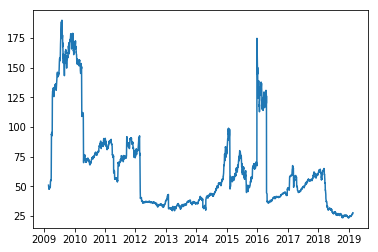

In [214]:
plt.plot(r.sum(axis=1))